# Machine Learning

## HSE, 2025

### Homework #1. Mathematical Optimization


Assignment completed by:

    Shulyak Andrey

### General Information

__Issue Date:__ 02/10/2025

__Deadline:__ 04:00 AM 10/10/2025

### Grading and Penalties

The number of points for each problem in this homework assignment is indicated next to the problem statement.

The grade for the homework assignment is calculated using the following formula:

$$
s \times 10/34 ,
$$

where $ s $ is the number of points you scored in total for all problems.

A late submission penalty of 1 **secondary** point per day is applied to the final grade for the assignment, but the delay cannot exceed one week.

**Important:** This homework assignment includes several problems for which you can earn bonus points. Bonus points are added to the regular points, and it may turn out that your final grade exceeds 10. In this case, that will be your grade. Therefore, it is **possible** to score more than 10 for this assignment.

**Attention!** Homework must be completed independently. Assistance in solving the homework from classmates or third parties is not allowed. "Similar" solutions are considered plagiarism, and all involved students—including those who copied—will receive a score of 0 for the assignment.

The use of generative models (e.g., ChatGPT) in solving the homework is permitted only for reference and educational purposes. Any other use of AI tools, such as automatically generating code based on the assignment, is considered plagiarism, and such homework will be graded 0 points.

If the solution uses approaches, functions, or formulas not covered in lectures and seminars, it is mandatory to cite the source: a link to documentation, an article, or another resource. Failure to properly cite sources may result in the assignment being completely nullified.

### Submission Format

File uploads with solutions are done through the Forms. You need to upload a file with the extension .ipynb (Python notebook).
The link will be provided in our Telegram channel.

### About the Assignment

In this assignment, we will practice working with mathematical analysis and optimization methods, a clear understanding of which is absolutely necessary for any task and model in machine learning.

In the first part of the assignment, we will work with the following function:

$$y(x) = x^{3} \ln(x)$$

### Task 1


#### 1.1. (1 point)

Calculate the derivative of this function analytically. To do this, either use a sheet of paper and attach a photo here, or use LaTeX markup language, which is supported in Jupyter notebooks.

# HERE THE LINK FOR PROOF 
https://drive.google.com/drive/folders/1JurQaqNqt1SToGkQ2MJWkEBFSc96meMF?usp=sharing

# p.s я вставил через cmd+v фото  док-во в ячейку, но если оно не отображается, то вот ссылка на гугл диск 

#### 1.2. (2 points)

Write a program function `f(x)` that would compute the value of our function at a given point and return this value as the answer; and write a program function `df(x)` that would compute the value of the derivative of our function at a given point and return this value as the answer.

Be sure to test all functions at a specific point. Ensure that the answers from your previous section (on paper) and the program in this section match completely.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def f(x):
    if x<=0:
        print('Error, give input greater than zero')
    else:
        return x**3 *math.log(x)

In [4]:
f(0)

Error, give input greater than zero


In [5]:
def df(x):
    if x<=0:
        print('Error, give input greater than zero')
    return 3*x**2*math.log(x)+x**2

In [6]:
df(1)

1.0

#### 1.3. (2 points)

Visualize our function (plot the graph).


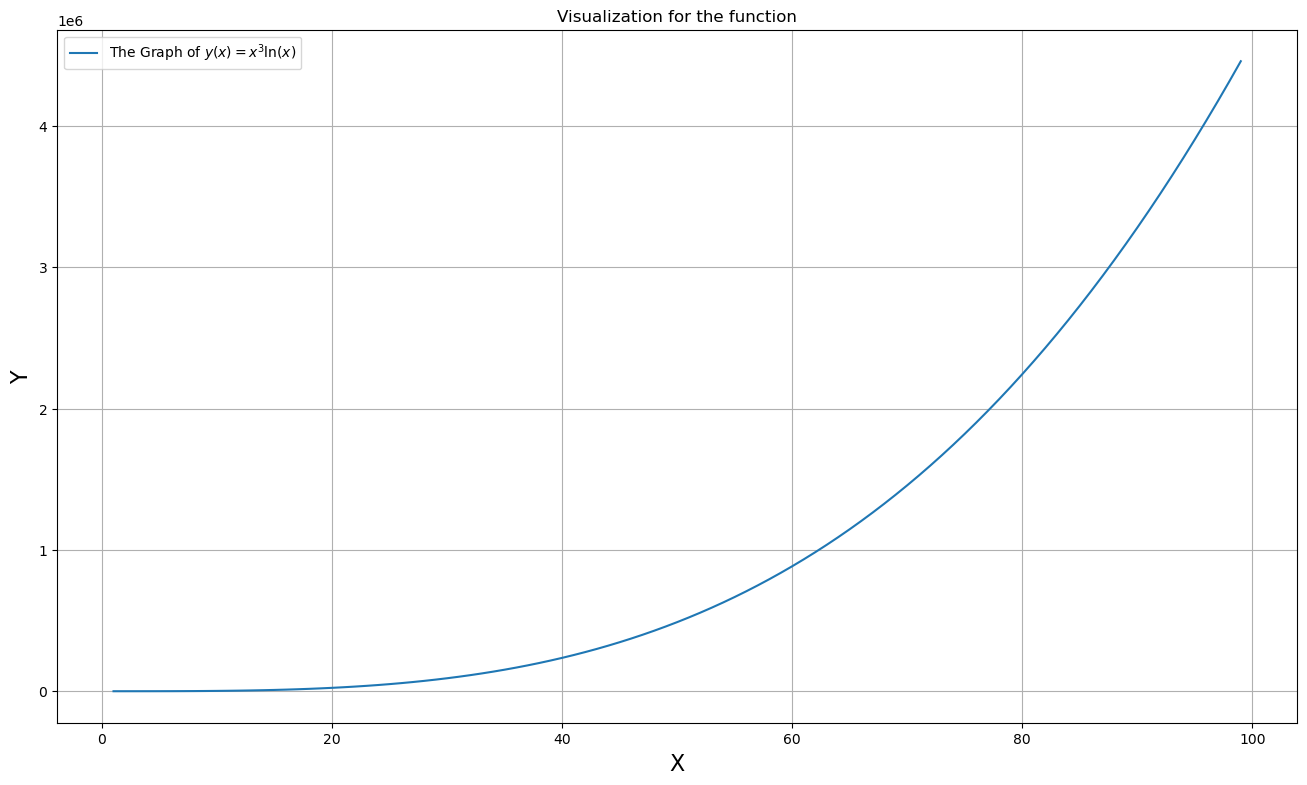

In [7]:
# Your code here

x_es = np.arange(1, 100,1)

y_es = []

for x in x_es:
    y=f(x)
    y_es.append(y)

plt.figure(figsize=(16,9))
sns.lineplot(x=x_es, y=y_es,label='The Graph of $y(x) = x^{3} \ln(x)$')
plt.title('Visualization for the function')

plt.xlabel('X', size=16)
plt.ylabel('Y',size=16)
plt.grid()
plt.legend()

### Task 2

#### 2.1. (4 points)

Implement the function `get_min_with_gd` that takes the initial point $x_0$, the number of steps, `lr` (learning rate), and `threshold`; performs gradient descent to find the minimum; and returns the sequence of points obtained at each step.

In [8]:
def get_min_with_gd(x0, steps, lr, threshold):
    x=x0
    path = [x]
    
    for i in range(steps):
        gradient= df(x)
        x_new = x - lr*gradient
        path.append(x_new)
        x=x_new
        
    return path


#### 2.2. (2 points)

Run the search for the minimum from several arbitrary points (at least 3).

Check that everything works as expected by plotting the graph of the coordinate of the point as a function of the iteration of gradient descent for each run.

In [9]:
points = [{'x0': 0.3, 'lr': 0.01},
          {'x0': 1.0, 'lr': 0.01},
           {'x0': 2.0, 'lr': 0.01},
          {'x0': 5.0, 'lr': 0.005}
         ]

In [10]:
result = {}

for i in range(len(points)):
    start = points[i]
    description = f'Run{i+1}'
    result[description] = get_min_with_gd(start['x0'], steps=100, lr=start['lr'], threshold=None)


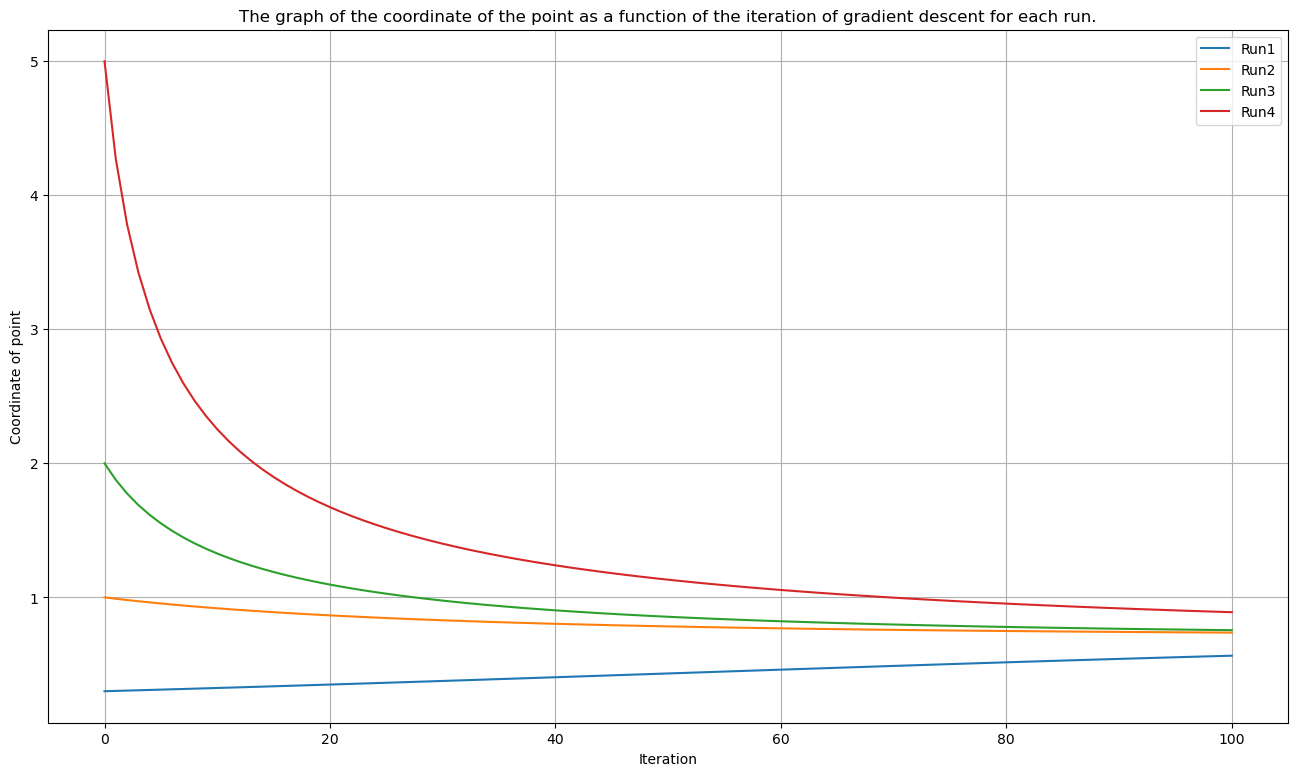

In [11]:
plt.figure(figsize=(16,9))

for run, x_description in result.items():
    plt.plot(x_description,label=f'{run}')
    
plt.title('The graph of the coordinate of the point as a function of the iteration of gradient descent for each run.')
plt.xlabel('Iteration')
plt.ylabel('Coordinate of point')
plt.grid()

plt.legend()
plt.show()

#### 2.3. (3 points)

Plot the graph of the function once again. On this graph, plot the movement of the algorithm from the initial points to the final point in different colors. Mark the true minimum on the graph with a separate point and label it (as text on the graph).

<function matplotlib.pyplot.show(close=None, block=None)>

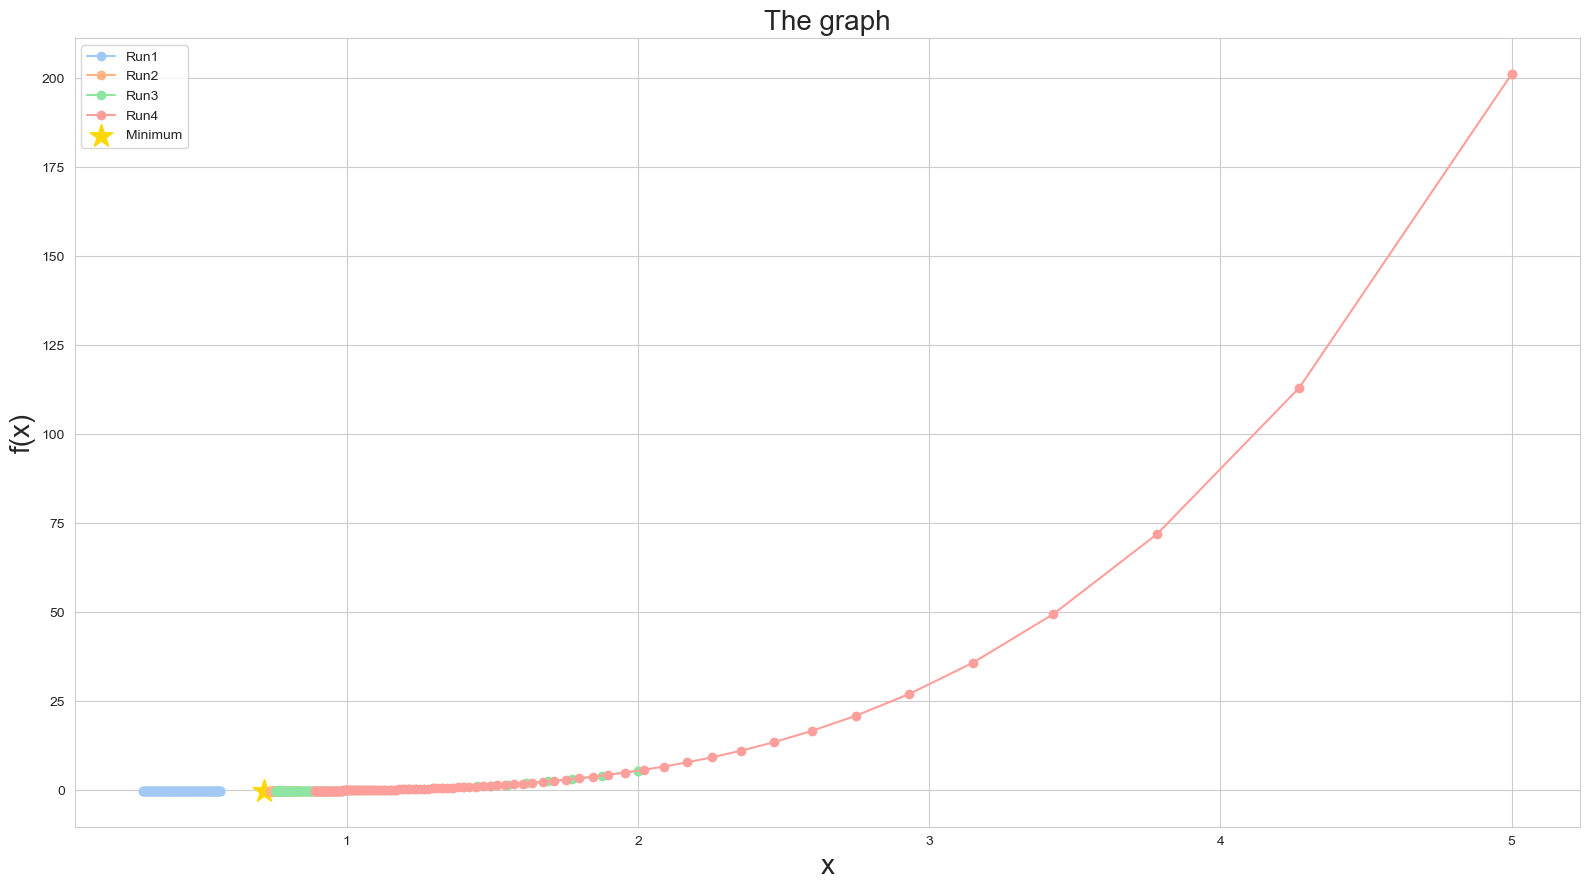

In [12]:
sns.set_style("whitegrid")

colors = sns.color_palette("pastel")

plt.figure(figsize=(16,9))

i = 0

for run in result:
    path = result[run]
    y_path = []
    
    for x in path:
        y_path.append(f(x))
        
    plt.plot(path, y_path, color= colors[i], marker='o', label=run)
    
    plt.scatter(path[0],f(path[0]), color=colors[i])
    plt.scatter(path[-1],f(path[-1]), color=colors[i], marker='X')
    i+=1
    
x_min = math.exp(-1/3)
y_min = f(x_min)

plt.scatter(x_min, y_min, color='gold', s=300, marker='*',label='Minimum')


plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)

plt.title('The graph', fontsize=20)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show
    
    


In [13]:
x_min = math.exp(-1/3)
y_min = f(x_min)
print(x_min)
print(y_min)

0.7165313105737893
-0.12262648039048077


### Task 3

Starting from Task 3, we will work with other functions.

Let

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5 \cdot e^{-y}))$$


#### 3.1. (1 point and 2 bonus points)

Is it true that \( f \) has a unique point of local minimum, and that this local minimum is also global? Why or why not? Prove your answer!

*Note: In this task, a graphical proof is worth 1 point; a rigorous mathematical proof is worth 2 bonus points.*

# HERE THE LINK FOR PROOF 
https://drive.google.com/drive/folders/1JurQaqNqt1SToGkQ2MJWkEBFSc96meMF?usp=sharing

In [35]:
def new_f(xy):
    x,y = xy
    return np.log((np.exp(x)+np.exp(-2*x))*(np.exp(y+1)+0.5*np.exp(-y)))

In [15]:
print(f"At the point x = {0}, y = {0}, the function takes the value {new_f([1,1])}")

At the point x = 0, y = 0, the function takes the value 3.073176089680499


In [38]:
print(new_f([0,0]))

1.861994804058251


/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_1966/2722049855.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


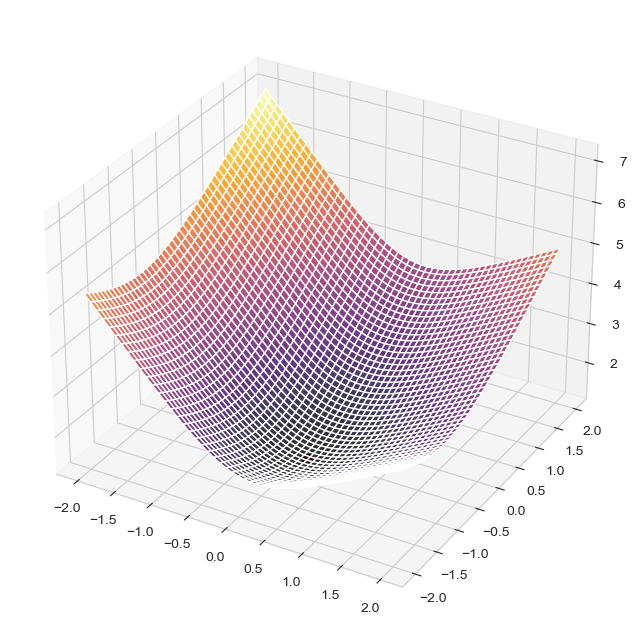

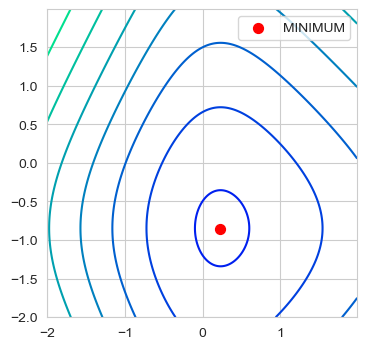

In [16]:
u, v = np.mgrid[-2:2:0.01, -2:2:0.01]
z = new_f([u, v])


#search for point

z_min_coor =np.argmin(z)

x_min, y_min, z_min = u.flat[z_min_coor], v.flat[z_min_coor], z.flat[z_min_coor]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno', alpha = 0.8)
ax.scatter(x_min, y_min,z_min, color='red', s=50, label= 'MINIMUM')

fig.show()


plt.figure(figsize=(4,4))

cont= plt.contour(u,v,z, cmap='winter')
plt.scatter(x_min, y_min, color='red', s=50, label= 'MINIMUM')
plt.legend()
plt.grid(True)
plt.show()
#On 3d graph we see only one "pit", and on contour graph we see that there is only one point

#### 3.2. (3 points and 2 bonus points)

Come up with some functions \( g \) and \( h \) of two variables such that
- the function \( g \) has no global minimum (not bounded below);
- the function \( h \) has at least two local minima that are not equal to each other.

Prove that your functions satisfy the stated criteria.

*Note: In this task, a graphical proof is evaluated within the main points; a rigorous mathematical proof is worth 2 bonus points.*

# HERE THE LINK FOR PROOF 
https://drive.google.com/drive/folders/1JurQaqNqt1SToGkQ2MJWkEBFSc96meMF?usp=sharing

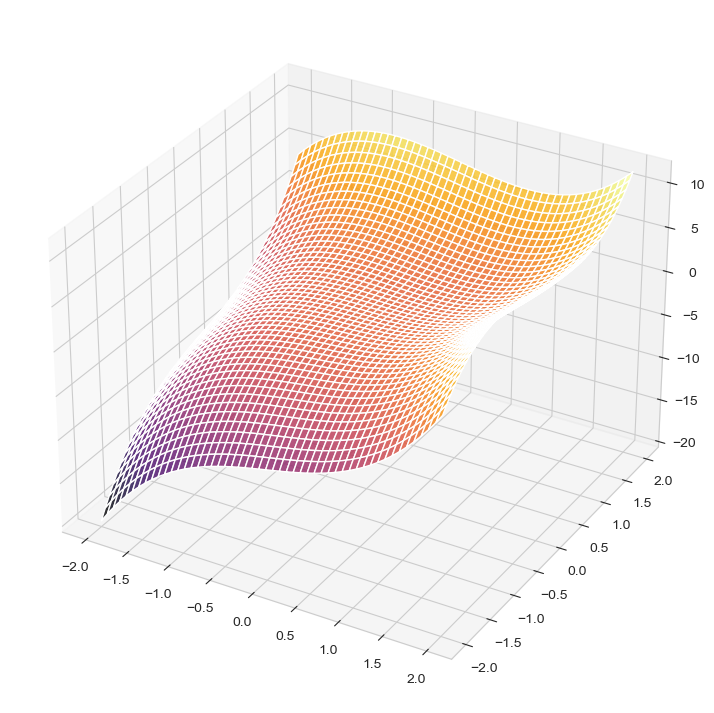

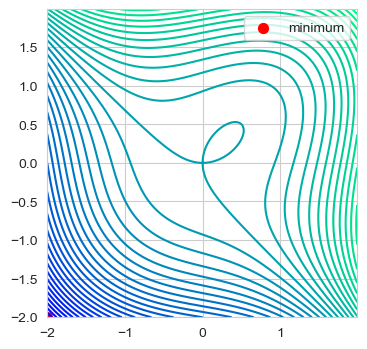

In [17]:
#the function ( g ) has no global minimum (not bounded below);

def g(xy):
    x,y = xy
    return x**3+y**3-x*y

u, v = np.mgrid[-2:2:0.01, -2:2:0.01]

z = g([u, v])

z_min_all = np.argmin(z)

x_min, y_min, z_min = u.flat[z_min_all], v.flat[z_min_all],z.flat[z_min_all]

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno', alpha = 0.8)

#counter plot to check 

plt.figure(figsize=(4,4))
plt.contour(u, v, z, levels=50, cmap='winter')
plt.scatter(x_min, y_min, color='red', s=50, label='minimum')

plt.legend()
plt.grid(True)
plt.show()

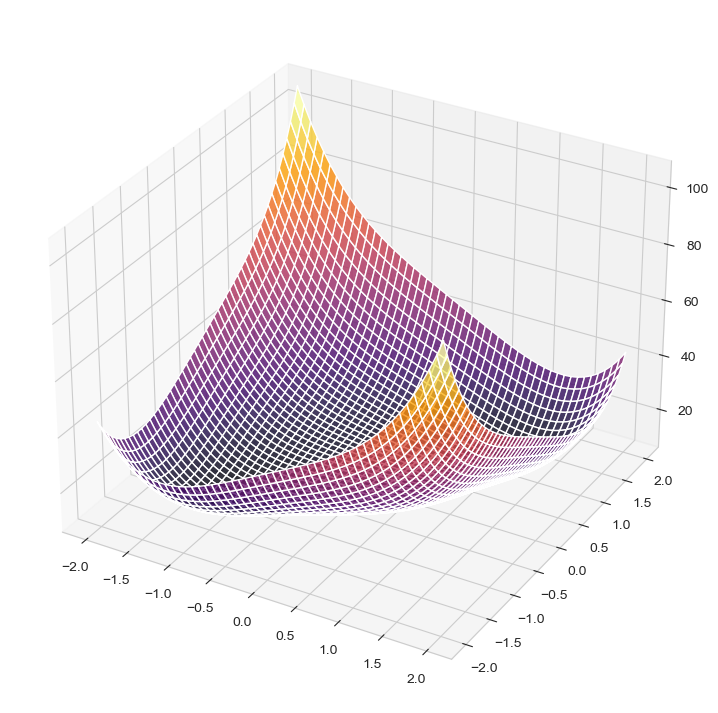

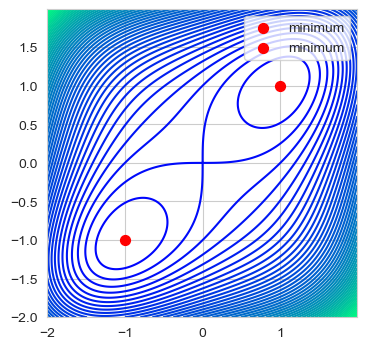

In [18]:
#the function ( h ) has at least two local minima that are not equal to each other. !!!!!!

def h(x,y):
    return 2*x**4 +2*y**4-8*x*y+12

u, v = np.mgrid[-2:2:0.01, -2:2:0.01]

z = h(u, v)

min_point = []

for i in range(1, u.shape[0]-1):
    for j in range(1, v.shape[1]-1):
        value = z[i,j]
        neighbor = [z[i-1,j], z[i+1,j], z[i,j-1],
                    z[i,j+1],z[i-1,j-1], z[i-1,j+1], z[i+1,j-1],z[i+1,j+1]]
        
        if value< min(neighbor):
            min_point.append((u[i,j], v[i,j], value))


#print('local minima:')
#for h in min_point:
#    print(h)
    
    
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno', alpha = 0.8)

#counter plot to check 

plt.figure(figsize=(4,4))
plt.contour(u, v, z, levels=50, cmap='winter')

for (x0, y0, m) in min_point:
    plt.scatter(x0, y0, color='red', s=50, label='minimum')

plt.legend()
plt.grid(True)
plt.show()

#### 3.3. (5 points)

Implement the function `get_min_with_rmsprop` that takes the initial point \( x_0 \), the number of steps, `lr`, `beta`, and `threshold`; performs gradient descent with RMSProp modification to find the minimum; and returns the sequence of points obtained at each step.

Here are the formulas for this algorithm:

$$ g^{n+1} = ∇f(w^{n}) $$
$$ \gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1})^2 $$
$$ w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1} $$

Here, \( α \) is the learning rate, \( ɛ \) is a small number (0.0001 can be used to avoid division by zero), and \( beta \) is the momentum term(measure of inertia).



In [19]:
def get_min_with_rmsprop(x0, num_step, lr, beta, threshold, grad_func):
    epsilon = 0.0001
    
    w = np.array(x0, dtype=float)
    
    sq_gradients = np.zeros(w.shape)
    sequence = [w.copy()]
    
    for n in range(num_step):
        g = grad_func(w)
        sq_gradients = (1-beta)*sq_gradients+beta *(g**2)
        
        w_new= w- (lr/np.sqrt(sq_gradients+epsilon))*g
        
        sequence.append(w_new.copy())
        
        if np.linalg.norm(w_new-w)<threshold:
            break
        
        w= w_new
    return sequence

In [20]:
#to check

def some_f(x):
    return 5*x

x0= np.array([10.0])

sequence = get_min_with_rmsprop(x0=x0, num_step=100, lr=0.1, beta=0.9, threshold= 0.000001, grad_func = some_f)

print(sequence[0])

print(sequence[-1])

print(len(sequence)-1)

[10.]
[0.04954476]
100


#### 3.4. (4 points)

Run the search for the minimum for all three functions ($f$, $g$, $h$) from several arbitrary points (at least 3, resulting in at least 9 runs).

Check that everything works as expected by plotting the graph of the coordinates of the point (2D graph) as it progresses through gradient descent for each run. All graphs should be plotted on three pairs of axes, arranged vertically on one canvas (separate axes for each function; different runs for one function should be displayed on the same axes).

In [21]:
#gradients

def g_new_f(xy, h=0.00001):
    x,y = xy
    f_x = (new_f((x+h,y)) - new_f((x-h,y)))/(2*h)
    
    f_y = (new_f((x,y+h)) - new_f((x,y-h)))/(2*h)
    
    return np.array([f_x,f_y])


def g_g(xy):
    x,y = xy
    return np.array([3*x**2-y, 3*y**2 -x])

def g_h(xy):
    x,y = xy
    return np.array([8*x**3 - 8*y, 8*y**3 - 8*x])

In [22]:
start_p = [(0.0, 0.0),
          (1.0, -1.0),
          (-2.0, 2.0),
          (0.5, 0.5),
          (-1.5, 0.5)]

result = {'f':[], 'g':[], 'h':[]}

for p in start_p:
    seq = get_min_with_rmsprop(x0=p, num_step=300, lr=0.1, beta=0.9, threshold= 0.000001, grad_func = g_new_f)
    result['f'].append(seq)
    
    seq = get_min_with_rmsprop(x0=p, num_step=300, lr=0.1, beta=0.9, threshold= 0.000001, grad_func = g_g)
    result['g'].append(seq)
    
    seq = get_min_with_rmsprop(x0=p, num_step=300, lr=0.1, beta=0.9, threshold= 0.000001, grad_func = g_h)
    result['h'].append(seq)

In [23]:
for f_name in ['f', 'g', 'h']:
    print ('It is function', f_name)
    for i in range(len(result[f_name])):
        seq = result[f_name][i]
        
        last_point = seq[-1]
        num_step = len(seq)-1
        print('Start point is ', start_p[i])
        print('End point is ', last_point)
        print('Num of steps is ', num_step)
        print()

It is function f
Start point is  (0.0, 0.0)
End point is  [ 0.1825399  -0.79758543]
Num of steps is  300

Start point is  (1.0, -1.0)
End point is  [ 0.1825399  -0.79758543]
Num of steps is  300

Start point is  (-2.0, 2.0)
End point is  [ 0.1825399  -0.79758543]
Num of steps is  300

Start point is  (0.5, 0.5)
End point is  [ 0.28203615 -0.89556175]
Num of steps is  300

Start point is  (-1.5, 0.5)
End point is  [ 0.28203615 -0.89556175]
Num of steps is  300

It is function g
Start point is  (0.0, 0.0)
End point is  [0. 0.]
Num of steps is  1

Start point is  (1.0, -1.0)
End point is  [-29.07273648 -31.08081584]
Num of steps is  300

Start point is  (-2.0, 2.0)
End point is  [-32.06707746 -28.05896974]
Num of steps is  300

Start point is  (0.5, 0.5)
End point is  [0.27710667 0.27710667]
Num of steps is  300

Start point is  (-1.5, 0.5)
End point is  [-31.5713117  -29.58023856]
Num of steps is  300

It is function h
Start point is  (0.0, 0.0)
End point is  [0. 0.]
Num of steps is  1



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


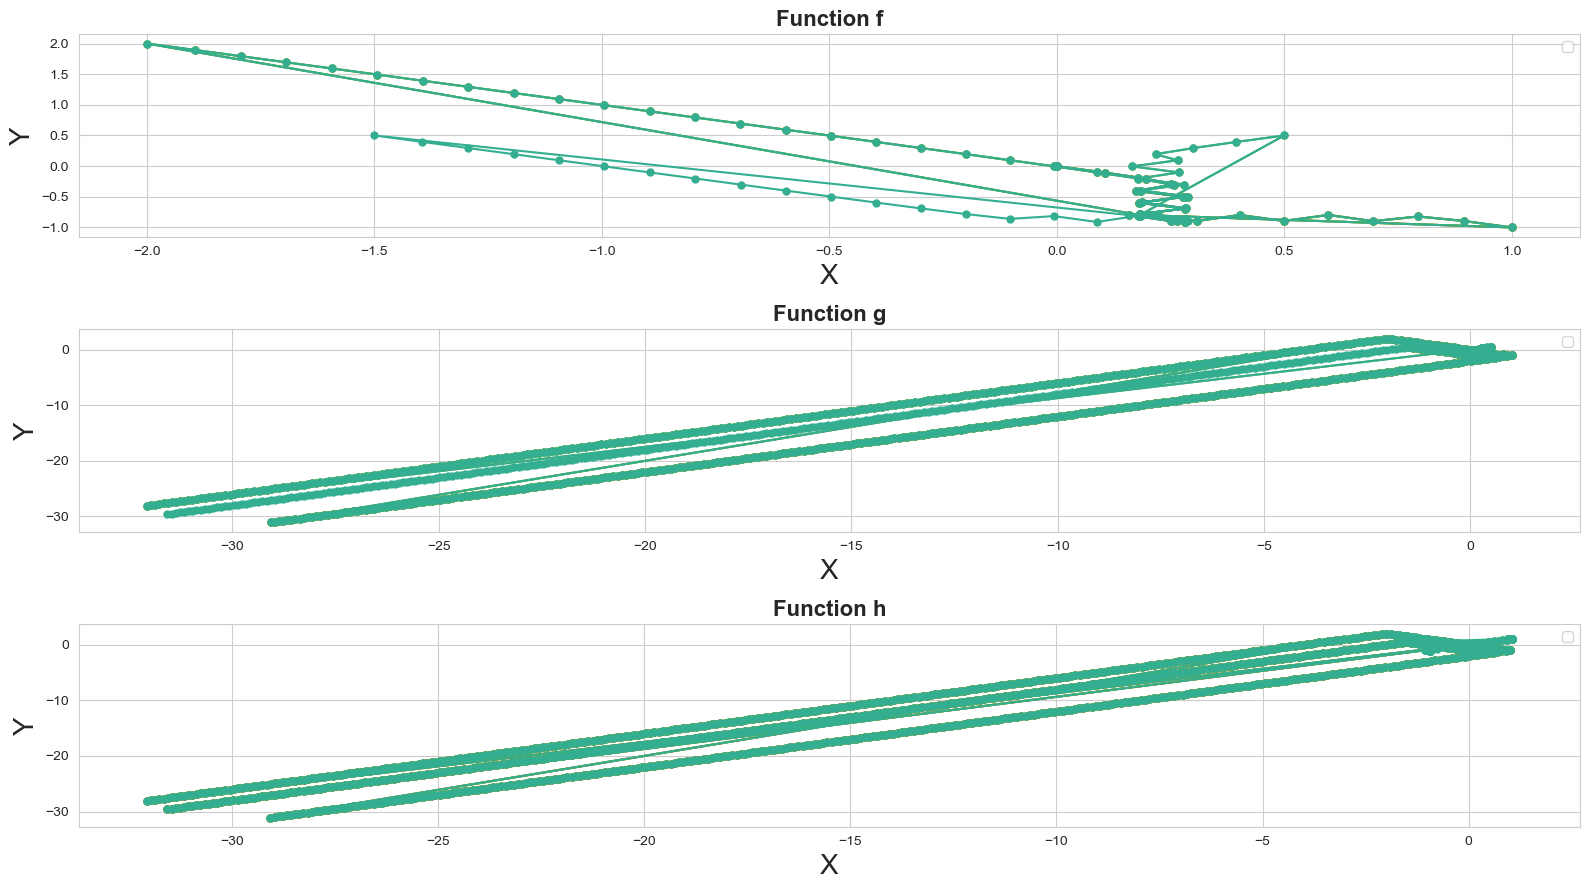

In [24]:
x_coordin = []
y_coordin = []

fig, axes = plt.subplots(3,1 ,figsize = (16,9))

clr = sns.color_palette("husl", 9)

func_n = ['f','g', 'h']

titles = ['Function f', 'Function g', 'Function h']


for z in range(len(func_n)):
    f_name = func_n[z]
    ax = axes[z]
    
    for i in range(len(result[f_name])):
        seq = result[f_name][i]
        
        for point in seq:
            x = point[0]
            y = point[1]
            
            x_coordin.append(x)
            y_coordin.append(y)
        ax.plot(x_coordin, y_coordin,'-o', color=clr[i],markersize = 5)
        
        ax.plot(x_coordin[0], y_coordin[0],'o', color=clr[i],markersize = 5)
        
        ax.plot(x_coordin[-1], y_coordin[-1],'*', color=clr[i],markersize = 5)
    
    
    ax.set_xlabel('X', size=20)
    ax.set_ylabel('Y',size=20)
    ax.set_title(titles[z],size=16,fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True)
plt.tight_layout()
plt.show()
            

#### 3.5. (3 points)

Plot the graphs of the functions again. On these graphs, plot the movement of the algorithm from the initial points to the final point in different colors. Where the functions have them, mark the true local minima on the graphs as separate points, and label them with text on the graph. All graphs should be plotted on three sets of axes, arranged vertically on one canvas—separate axes for each function.

In [25]:
# Your code here

### Task 4

#### Scaling to Multidimensional Case (4 points)

Ensure that your `get_min_with_rmsprop` function from the previous task works not only with functions of two variables but also with functions of an arbitrary number of variables. Make any necessary adjustments to the function below.

Devise any function of 5 variables that has some minimum (for example, the simplest point \((0, 0, 0, 0, 0)\)) and run gradient descent with RMSProp for this function. Verify that the gradient descent indeed converges to the correct extremum point.

In [26]:
def func_5d(x):
    return np.sum(x**2)


def grad_func_5d(x):
    return 2*x

In [27]:
starting_points = [
    np.array([10.0, -5.0, 3.0, -8.0, 6.0]),
    np.array([1.0, 1.0, 1.0, 1.0, 1.0]),
    np.array([-3.0, 4.0, -2.0, 5.0, -1.0])
]

In [28]:
run_number = 1
for start_point in starting_points:
    sequence = get_min_with_rmsprop(
        x0=start_point,
        num_step=500,
        lr=0.1,
        beta=0.9,
        threshold=0.0000001,
        grad_func=grad_func_5d
    )
    print(f"\nRun {run_number}:")
    print(sequence[-1])
    print(func_5d(start_point))
    print(func_5d(sequence[-1]))
    print(len(sequence)-1)
    print(np.linalg.norm(sequence[-1]))
    
    run_number = run_number+1
#does it converges?

if np.linalg.norm(sequence[-1]) <0.01:
    print('GOOD')
else:
    print('FAIL')


Run 1:
[ 0.04974937 -0.04974937  0.04974937 -0.04974937  0.04974937]
234.0
0.012375000000000002
500
0.11124297730643495

Run 2:
[0.04974937 0.04974937 0.04974937 0.04974937 0.04974937]
5.0
0.012374999999999999
500
0.11124297730643494

Run 3:
[-0.04974937  0.04974937 -0.04974937  0.04974937 -0.04974937]
55.0
0.012375000000000006
500
0.11124297730643497
FAIL


In [29]:
#need to do the following adjustments 

In [33]:
def get_min_with_rmsprop(x0, num_step, lr, beta, threshold, grad_func):
    epsilon = 0.0001
    
    w = np.array(x0, dtype=float)
    
    sq_gradients = np.zeros(w.shape)
    sequence = [w.copy()]
    
    for n in range(num_step):
        g = grad_func(w)
        sq_gradients = beta*sq_gradients+(1-beta) *(g**2)
        
        new_lr = lr/(np.sqrt(sq_gradients)+epsilon)
        
        w_new= w- new_lr*g
        
        sequence.append(w_new.copy())
        
        if np.linalg.norm(w_new-w)<threshold and np.linalg.norm(g) < threshold:
            break
        
        w= w_new
    return sequence

In [34]:
run_number = 1
for start_point in starting_points:
    sequence = get_min_with_rmsprop(
        x0=start_point,
        num_step=1000,
        lr=0.1,
        beta=0.9,
        threshold=0.0000001,
        grad_func=grad_func_5d
    )
    print(f"\nRun {run_number}:")
    print(sequence[-1])
    print(func_5d(start_point))
    print(func_5d(sequence[-1]))
    print(len(sequence)-1)
    print(np.linalg.norm(sequence[-1]))
    
    if np.linalg.norm(sequence[-1]) <0.01:
        print('GOOD')
    else:
        print('FAIL')
    
    run_number = run_number+1



Run 1:
[ 0.04995 -0.04995 -0.04995 -0.04995  0.04995]
234.0
0.012475012500000004
1000
0.11169159547611451
FAIL

Run 2:
[1.31013892e-09 1.31013892e-09 1.31013892e-09 1.31013892e-09
 1.31013892e-09]
5.0
8.582320003046259e-18
28
2.929559694398846e-09
GOOD

Run 3:
[ 0.04995 -0.04995 -0.04995  0.04995 -0.04995]
55.0
0.012475012500000004
1000
0.11169159547611451
FAIL


In [ ]:
#короче, что-то там явно не так, но я уже не могу больше это решать...